In [2]:
import numpy as np 
import mltools as ml
import matplotlib.pyplot as plt 


Question1

1.1

T (a +bx1 ) is a linear classifier on one feature x1, so it has VC dimension on 2. Therefore, it can shatter a,b but not c,d, since the line is vertical, which can help to split the classes in graph a,b

1.2

T(a+bx1+cx2) has two features x1 x2, and with the bias a, it has three parameters in total. So it has VC dimensions on 3. Therefore, it can shatter a,b,c but not d. Since the line is not straight, but arbitray, which can help to split classes in graph a,b,c

1.3

T((x1−a)2+(x2−b)2+c) is a quadratic classifier, and its decision boundaries are circles centeredat (a,b) with radius root of -c.
It is obvious that it can shatter (a).
To shatter (b), the center of the circle can be positioned on top of one data point and scale the radius to either include or not include the other data point depending on the classes of the two data points.
To shatter (c), when the classes of all three data points are the same, simply position and scale the circle to include all thre data points. When the classes of two data points are different from the third data point, the center of the circle can be positioned on that third data point and scale the radius to exclude the other two data points.
However, it cannot shatter (d) because any circle that includes points (2, 2) and (8, 6) has to include point (6, 4), so when (2, 2) and (8, 6) have the same class, it is impossible for (6, 4) to have a different class.
Therefore, the VC dimension is 3, and it can shatter (a) (b) (c) but not (d).

Question2

2.1

In [3]:
Hy=-(0.4*np.log2(0.4)+0.6*np.log2(0.6))
print(Hy)

0.9709505944546686


2.2

In [4]:
p_x1=6/10
h_x1_1=-(1/2*np.log2(0.5)+(1-0.5)*np.log2(1-0.5))
h_x1_0=-(1/4*np.log2(0.25)+(1-1/4)*np.log2(1-0.25))
IG_x1=Hy-p_x1*h_x1_1-(1-p_x1)*h_x1_0
print("information gain for x1 is:",IG_x1)

information gain for x1 is: 0.04643934467101546


In [5]:
p_x2=5/10
h_x2_1=-(0+(1)*np.log2(1))
h_x2_0=-(4/5*np.log2(4/5)+(1-4/5)*np.log2(1-4/5))
IG_x2=Hy-p_x2*h_x2_1-(1-p_x2)*h_x2_0
print("information gain for x2 is:",IG_x2)

information gain for x2 is: 0.6099865470109874


In [6]:
p_x3=7/10
h_x3_1=-(3/7*np.log2(3/7)+(1-3/7)*np.log2(1-3/7))
h_x3_0=-(1/3*np.log2(1/3)+(1-1/3)*np.log2(1-1/3))
IG_x3=Hy-p_x3*h_x3_1-(1-p_x3)*h_x3_0
print("information gain for x3 is:",IG_x3)

information gain for x3 is: 0.0058021490143456145


In [7]:
p_x4=7/10
h_x4_1=-(2/7*np.log2(2/7)+(1-2/7)*np.log2(1-2/7))
h_x4_0=-(2/3*np.log2(2/3)+(1-2/3)*np.log2(1-2/3))
IG_x4=Hy-p_x4*h_x4_1-(1-p_x4)*h_x4_0
print("information gain for x4 is:",IG_x4)

information gain for x4 is: 0.09127744624168


In [8]:
p_x5=3/10
h_x5_1=-(1/3*np.log2(1/3)+(1-1/3)*np.log2(1-1/3))
h_x5_0=-(3/7*np.log2(3/7)+(1-3/7)*np.log2(1-3/7))
IG_x5=Hy-p_x5*h_x5_1-(1-p_x5)*h_x5_0
print("information gain for x5 is:",IG_x5)

information gain for x5 is: 0.0058021490143457255


So we should split on the feature 2 since it has the largest information gain.

2.3

In [9]:
data = np.array([[0,0,1,1,0,-1], 
                 [1,1,0,1,0,-1], 
                 [0,1,1,1,1,-1], 
                 [1,1,1,1,0,-1], 
                 [0,1,0,0,0,-1], 
                 [1,0,1,1,1, 1], 
                 [0,0,1,0,0, 1], 
                 [1,0,0,0,0, 1], 
                 [1,0,1,1,0, 1],
                 [1,1,1,1,1,-1]])
X = data[:,:-1]
Y = data[:,-1]

In [10]:
print('Split on feature 2:')
l_tree = data[X[:,1] ==0,:]
r_tree = data[X[:,1] ==1,:]
print('Left tree:') 
print(l_tree) 
print('Right tree:') 
print(r_tree)

Split on feature 2:
Left tree:
[[ 0  0  1  1  0 -1]
 [ 1  0  1  1  1  1]
 [ 0  0  1  0  0  1]
 [ 1  0  0  0  0  1]
 [ 1  0  1  1  0  1]]
Right tree:
[[ 1  1  0  1  0 -1]
 [ 0  1  1  1  1 -1]
 [ 1  1  1  1  0 -1]
 [ 0  1  0  0  0 -1]
 [ 1  1  1  1  1 -1]]


In [11]:
X = l_tree[:,:-1]
Y = l_tree[:,-1]
print(X)
print(Y)

[[0 0 1 1 0]
 [1 0 1 1 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 1 1 0]]
[-1  1  1  1  1]


Then calculate the information gain again to choose the next split node. 

In [12]:
Hy_1=-(4/5*np.log2(4/5)+1/5*np.log2(1/5))

In [13]:
newp_x1=3/5
newh_x1_1=-(1*np.log2(1)+0)
newh_x1_0=-(1/2*np.log2(0.5)+(1-1/2)*np.log2(1-0.5))
newIG_x1=Hy_1-newp_x1*newh_x1_1-(1-newp_x1)*newh_x1_0
print("information gain for x1 is:",newIG_x1)

information gain for x1 is: 0.3219280948873623


In [14]:
newp_x2=0
print("information gain for x2 is:",0)

information gain for x2 is: 0


In [15]:
newp_x3=4/5
newh_x3_1=-(3/4*np.log2(3/4)+(1-3/4)*np.log2(1-3/4))
newh_x3_0=-(1*np.log2(1)+(0))
newIG_x3=Hy_1-newp_x3*newh_x3_1-(1-newp_x3)*newh_x3_0
print("information gain for x3 is:",newIG_x3)

information gain for x3 is: 0.07290559532005603


In [16]:
newp_x4=3/5
newh_x4_1=-(2/3*np.log2(2/3)+(1-2/3)*np.log2(1-2/3))
newh_x4_0=-(1*np.log2(1)+(0))
newIG_x4=Hy_1-newp_x4*newh_x4_1-(1-newp_x4)*newh_x4_0
print("information gain for x4 is:",newIG_x4)

information gain for x4 is: 0.17095059445466865


In [17]:
newp_x5=1/5
newh_x5_1=-(1*np.log2(1)+(0))
newh_x5_0=-(3/4*np.log2(3/4)+(1-3/4)*np.log2(1-3/4))
newIG_x5=Hy_1-newp_x5*newh_x5_1-(1-newp_x5)*newh_x5_0
print("information gain for x5 is:",newIG_x5)

information gain for x5 is: 0.07290559532005603


since x1 has the largest information gain this time, choose x1 as the next split node.

In [18]:
print('Split on feature 1:')
data=l_tree
l_tree = data[X[:,0] ==0,:]
r_tree = data[X[:,0] ==1,:]
print('Left tree:') 
print(l_tree) 
print('Right tree:') 
print(r_tree)

Split on feature 1:
Left tree:
[[ 0  0  1  1  0 -1]
 [ 0  0  1  0  0  1]]
Right tree:
[[1 0 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 1 1 0 1]]


Since the right tree is all predicted +1, we should only look at the left tree. By looking at the left tree, only 4th feature is useful. So we split on it next. 

In [19]:
X = l_tree[:,:-1]
Y = l_tree[:,-1]

In [20]:
print('Split on feature 4:')
data = l_tree
l_tree = data[X[:,3] == 0,:] 
r_tree = data[X[:,3] == 1,:] 
print('Left data:') 
print(l_tree)
print('Right data:') 
print(r_tree)

Split on feature 4:
Left data:
[[0 0 1 0 0 1]]
Right data:
[[ 0  0  1  1  0 -1]]


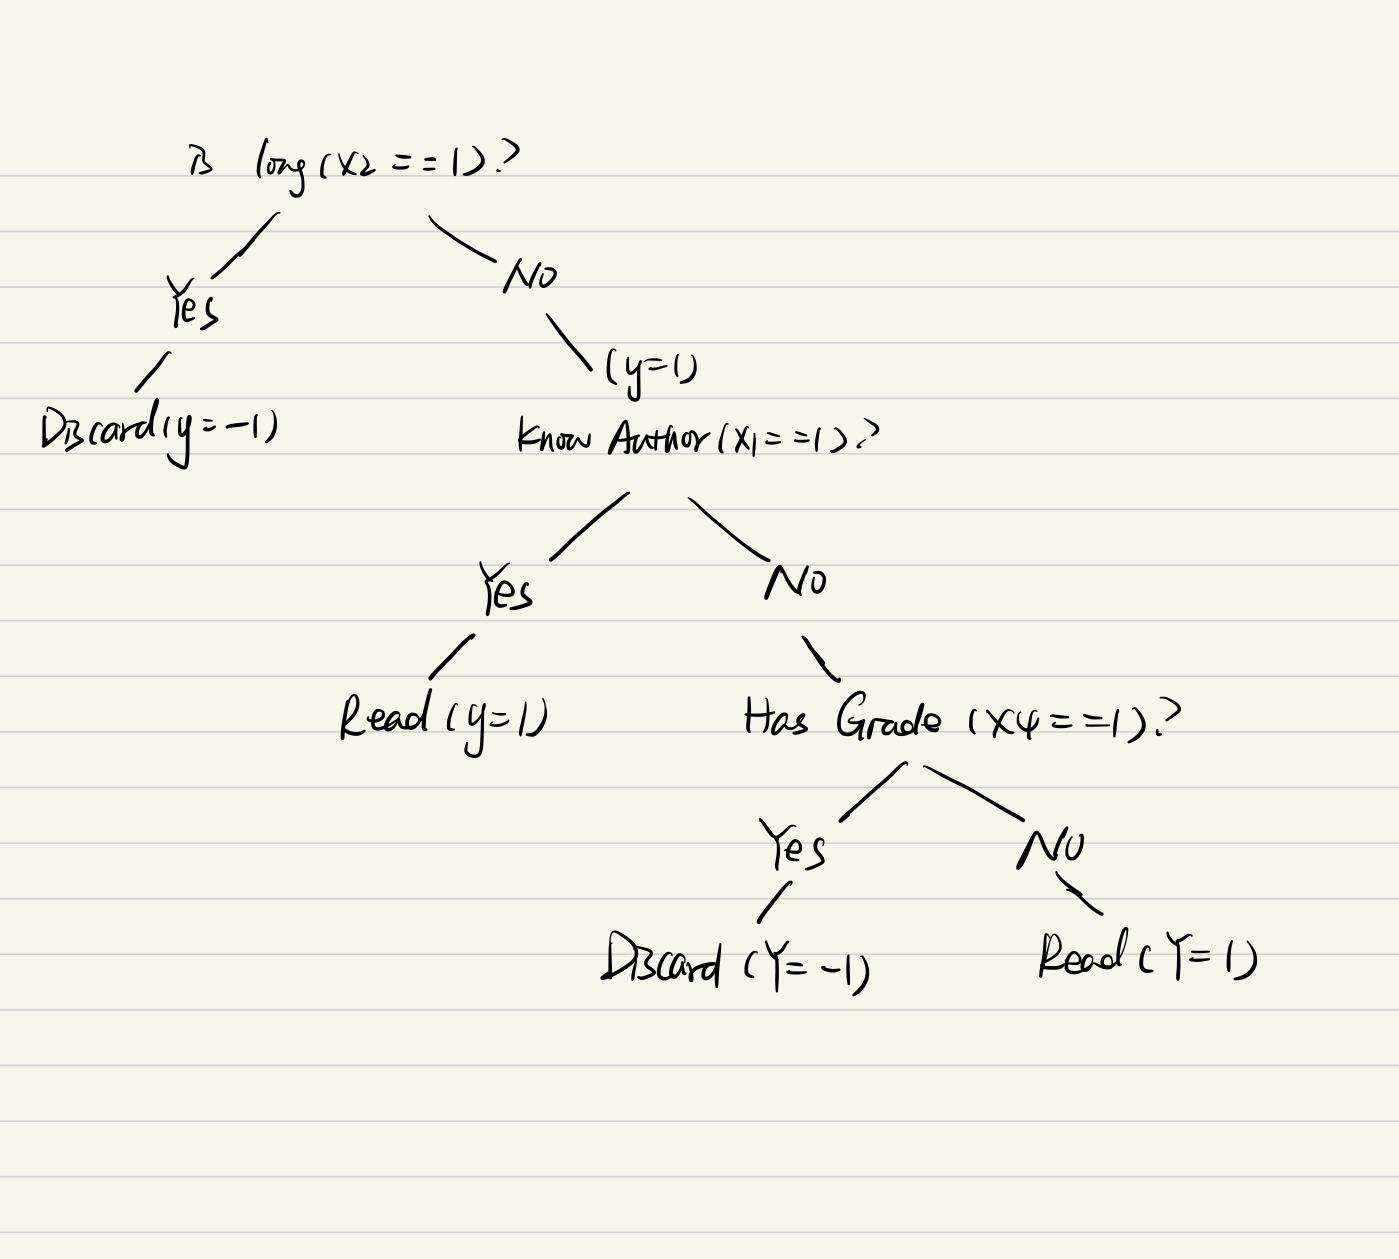

In [33]:
from IPython.display import Image
Image(filename = '/Users/wangyiting/Desktop/q2.jpeg', width=800, height=600)

In [ ]:
# decision tree is 

# if (long):
#     discard
# else:
#     if (know author): 
#         read
#     else:
#         if (has grade):
#             discard
#         else:
#             read


Question3

3.1

In [48]:
X = np.genfromtxt('data/X_train.txt', delimiter=None) 
Y = np.genfromtxt('data/Y_train.txt', delimiter=None) 
X,Y = ml.shuffleData(X,Y)

In [49]:
for i in range(0, X.shape[1]):
    print("The data of feature {}".format(i+1))
    print(f"Min's is {np.min(X[:,i])}") 
    print(f"Max is {np.max(X[:,i])}") 
    print(f"Mean is {np.mean(X[:,i])}") 
    print(f"Variance  is {np.var(X[:,i])}") 
    print()

The data of feature 1
Min's is 0.87589
Max is 19.167
Mean is 6.498652902750002
Variance  is 6.405048191357352

The data of feature 2
Min's is 0.0
Max is 9238.0
Mean is 138.09383
Variance  is 443951.74644593114

The data of feature 3
Min's is 0.0
Max is 13630.0
Mean is 928.25902
Variance  is 3081761.81694864

The data of feature 4
Min's is 0.0
Max is 13.23
Mean is 2.09713912048
Variance  is 4.363440470613409

The data of feature 5
Min's is 152.5
Max is 252.5
Mean is 232.82676815000002
Variance  is 97.62573174864559

The data of feature 6
Min's is 0.99049
Max is 975.04
Mean is 10.271590475900002
Variance  is 404.6462450411814

The data of feature 7
Min's is 10.0
Max is 31048.0
Mean is 3089.923365
Variance  is 15651513.756432075

The data of feature 8
Min's is 0.0
Max is 73.902
Mean is 2.691718452150001
Variance  is 2.1987784743582655

The data of feature 9
Min's is 214.25
Max is 252.5
Mean is 241.55415050000005
Variance  is 35.28633980334975

The data of feature 10
Min's is 0.0
Max is 66

3.2

In [50]:
Xtr, Ytr = X[:10000], Y[:10000]
Xva, Yva = X[10000:20000], Y[10000:20000]

In [51]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
print("Training error:", learner.err(Xtr, Ytr)) 
print("Validation error:", learner.err(Xva, Yva))

Training error: 0.0038
Validation error: 0.3797


3.3

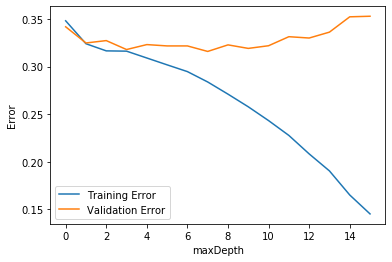

Best maxDepth: 7
Best Error: 0.3159


In [52]:
depth = np.arange(16) 
train_err = [] 
valid_err = []
for d in depth:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=d) 
    train_err.append(learner.err(Xtr, Ytr)) 
    valid_err.append(learner.err(Xva, Yva))

plt.plot(depth, train_err, depth, valid_err) 
plt.legend(['Training Error', 'Validation Error']) 
plt.xlabel('maxDepth')
plt.ylabel('Error')
plt.show()


bestDepth = depth[np.argmin(valid_err)] 
print('Best maxDepth:', bestDepth) 
print('Best Error:', np.min(valid_err))

With higher maxDepth, the model will have higher complixity since it may overfitting. 
From the plot we can see that the validation error is min at maxDepth=7,which can provides the best decision tree model.

3.4

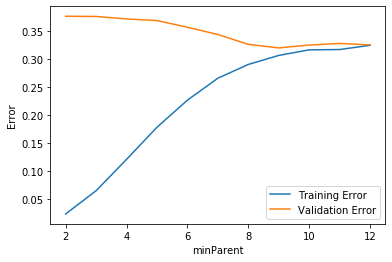

Best minParent: 512
Best Error: 0.3194


In [70]:
parent = 2 ** np.arange(2,13)
train_err = []
valid_err = []
for p in parent:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=p)
    train_err.append(learner.err(Xtr, Ytr)) 
    valid_err.append(learner.err(Xva, Yva))

power=np.arange(2,13)
plt.plot(power,train_err, power, valid_err)
plt.legend(['Training Error', 'Validation Error']) 
plt.xlabel('minParent')
plt.ylabel('Error')
plt.show()

bestParent = parent[np.argmin(valid_err)] 
print('Best minParent:', bestParent) 
print('Best Error:', np.min(valid_err))


With higher minParent, the model will have lower complixity since it will prevent the tree from overfitting. 
From the plot we can see that the validation error is min at minparent at 512,which can provides the best decision tree model.

3.5

Since the combination of maxDepth and minParent interact, so we should only choose one feature to fit the best model. 
Comparing the best error from 3.3 and 3.4, I can see that best error is lower with the best maxDepth, which can hel p to get the best model. 

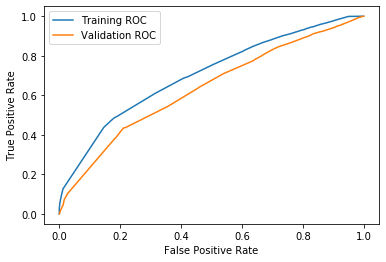

Training AUC: 0.7092040507056055
Validation AUC: 0.636819075340499


In [62]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=bestDepth)
fprTr,tprTr,tnrTr = learner.roc(Xtr, Ytr)
fprVa,tprVa,tnrVa = learner.roc(Xva, Yva)
plt.plot(fprTr, tprTr, fprVa, tprVa) 
plt.legend(['Training ROC', 'Validation ROC']) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()
print('Training AUC:', learner.auc(Xtr, Ytr))
print('Validation AUC:', learner.auc(Xva, Yva))

3.6

Username:echoyitinnn

AUC:0.6850246218751179

Same as 3.5, I also choose maxDepth=7 for the best model. 

In [71]:
learner = ml.dtree.treeClassify(X, Y, maxDepth=bestDepth)
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[ :,1])).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='Id,Prob1',comments='',delimiter=',')

In [72]:
print('AUC:', learner.auc(X, Y))

AUC: 0.6850246218751179


Question 4

I study together with yan yuling, and liu tianle to discusess about the lecture pdf, discussion , and the online information gain and VC dimension study resources about its definitiona and some of its examples. Also we discuss about what each hw questions need to make sure we don't misunderstand questions. 